<a href="https://colab.research.google.com/github/drshahizan/special-topic-data-engineering/blob/main/project/submission/Gadgeteen/Gadgeteen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Retrieving


In [ ]:
CLIENT_ID = '-R0ZxQ_ODZQhIXv0dWtWZw'
SECRET_KEY = 'NZFugdkW8vcg0dBMIadBMruyejgKkA'

In [ ]:
import requests
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [ ]:
auth = requests.auth.HTTPBasicAuth(CLIENT_ID, SECRET_KEY)
data = {
    'grant_type' : 'password',
    'username' : 'gadgeteen',
    'password' : 'gadgetech'
}
headers = {'User-Agent' : 'MyAPI/0.0.1'}
res = requests.post('https://www.reddit.com/api/v1/access_token', auth=auth, data=data, headers=headers)
TOKEN = res.json()['access_token']

In [ ]:
headers['Authorization'] = f'bearer {TOKEN}'
params = {
  'q': 'ChatGPT',
  'limit': 25,
  'sort': 'new'
}
res = requests.get("https://oauth.reddit.com/r/ChatGPT/search",
                   headers=headers, params=params)

In [46]:
data = []

for post in res.json()['data']['children']:
  post_data = {
        'subreddit': post['data']['subreddit'],
        'title': post['data']['title'],
        'selftext': post['data']['selftext'],
        'upvote_ratio': post['data']['upvote_ratio'],
        'ups': post['data']['ups'],
        'downs': post['data']['downs'],
        'score': post['data']['score']
  }
  data.append(post_data)
  # print(post_data)

df = pd.DataFrame(data)
df

,subreddit,title,selftext,upvote_ratio,ups,downs,score
0,asheville,Asheville's 10 commandments by chatGPT,"Not bad chatbot, not bad",1.0,1,0,1
1,WojakCompass,(first compass) Study methods I use to get through college with a 3.5 GPA,,1.0,1,0,1
2,Papaplatte,Subreddit zusammengefasst,,1.0,3,0,3
3,ChatGPT,Is ChatGPT4 better at writing essays than ChatGPT 3.5?,"I tried to make ChatGPT 3.5 write essays but the results despite various prompts were always repetitive and uncreative, is ChatGPT 4 better at writing essays? maybe there are plugins to adapt it to this?",1.0,1,0,1
4,dancarlin,Chatgpt 4 paid version does a way better Dan then 3.5. Here is the story of Waco in theme of Dan,"You will obviously read this in your head using Dans voice:\n\n[Begin in the style of Dan Carlin's Hardcore History]\n\n""Imagine yourself in the early 1990s, America, the 'land of the free,' is embarking on its final decade of the 20th century. This is a time of grunge, of reinventing the cultural wheel. This is the era of 'The X-Files,' of suspicion and conspiracy. It's a strange, transformative time to be alive, and yet, tucked away in the heartland, a community in Waco, Texas is about to be drawn into a siege that feels as ancient as humanity's first quarrels.\n\nDavid Koresh, born Vernon Wayne Howell, is leading the Branch Davidians, a sect that split from the Seventh-day Adventist Church. Koresh has a claim - he's the final prophet. He's charismatic, passionate, and, like many messiah figures throughout history, incredibly controversial. He's created a community at Mount Carmel Center, an Eden for those who subscribe to his prophecies. Yet, Eden, as we know, is fraught with peril.\n\nThe Bureau of Alcohol, Tobacco, and Firearms (ATF) has concerns about alleged illegal weapons stockpiles at the Mount Carmel Center. On February 28, 1993, the ATF attempts to execute a search warrant. The Branch Davidians resist. Gunfire is exchanged. By the time the smoke clears, four federal agents and six Branch Davidians are dead. This is not just a simple law enforcement operation anymore. This is a siege. This is a war.\n\nThe FBI takes command, and a 51-day standoff begins. Negotiations oscillate between hope and despair. Children are released, but Koresh refuses to surrender. He talks of apocalyptic revelations, of divine commandments, echoing conflicts that have riddled human history since our earliest scriptures. As in those ancient tales, there's no room for compromise. The situation escalates, until finally, on April 19th, the FBI launches a tear gas assault. A fire engulfs the Mount Carmel Center. When the flames die down, 76 Branch Davidians, including Koresh, are dead. \n\nNow, like so many events in history, Waco is a Rorschach test. Some see an overreaching government violently crushing a religious minority. Others see a dangerous cult that put its own members, including children, in harm's way. The siege becomes a rallying point for the anti-government sentiment brewing in the 1990s, culminating in the Oklahoma City bombing two years later, a response, as the bomber Timothy McVeigh claimed, to the Waco siege. \n\nThe story of Waco isn't just a tale of a siege; it's a microcosm of larger tensions that have existed for millennia: belief versus law, individual versus state, freedom versus security. And like all the best stories in history, it leaves us with more questions than answers.""\n\n[End in the style of Dan Carlin's Hardcore History]",1.0,1,0,1
5,ArtificialInteligence,Could you recommend me an AI to write an essay that is creative enough and non-repetitive?,"I'm looking for an AI that is able to write a quite creative and non-repetitive essay, I tried with chatGPT 3.5 but it's not creative enough, could you please help me?",0.5,0,0,0
6,chatgpt_prompts_,ChatGpt to generate new blog by providing bunch of articles,"I am using chatgpt 3, and I want chat GPT 3 to generate a new article by giving a number of comparable similar articles on newer topic tha

# Data Cleaning and Preprocessing

In [ ]:
# Drop any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any missing values (NaN)
df.dropna(inplace=True)

# Remove any unnecessary columns
columns_to_keep = ['subreddit', 'title', 'selftext', 'upvote_ratio', 'ups', 'downs', 'score']
df = df[columns_to_keep]

# Remove leading/trailing whitespaces in the text columns
df['title'] = df['title'].str.strip()
df['selftext'] = df['selftext'].str.strip()

# Convert the 'title' and 'selftext' columns to lowercase and remove punctuation
df['clean_text'] = df['title'].str.lower() + ' ' + df['selftext'].str.lower()
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Reset the index
df.reset_index(drop=True, inplace=True)

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_social_media_data.csv', index=False)
df

# Sentiment Analysis

In [49]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the necessary NLTK resources (run only once)
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
# Apply sentiment analysis to the 'title' column
df['sentiment'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify the sentiment
threshold = 0.1

df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x >= threshold else 'negative' if x <= -threshold else 'neutral')

df[['clean_text', 'sentiment', 'sentiment_class']]

,clean_text,sentiment,sentiment_class
0,ashevilles 10 commandments by chatgpt not bad chatbot not bad,0.6908,positive
1,first compass study methods i use to get through college with a 35 gpa,0.0000,neutral
2,subreddit zusammengefasst,0.0000,neutral
3,is chatgpt4 better at writing essays than chatgpt 35 i tried to make chatgpt 35 write essays but the results despite various prompts were always repetitive and uncreative is chatgpt 4 better at writing essays maybe there are plugins to adapt it to this,0.5106,positive
4,chatgpt 4 paid version does a way better dan then 35 here is the story of waco in theme of dan you will obviously read this in your head using dans voice\n\nbegin in the style of dan carlins hardcore history\n\nimagine yourself in the early 1990s america the land of the free is embarking on its final decade of the 20th century this is a time of grunge of reinventing the cultural wheel this is the era of the xfiles of suspicion and conspiracy its a strange transformative time to be alive and yet tucked away in the heartland a community in waco texas is about to be drawn into a siege that feels as ancient as humanitys first quarrels\n\ndavid koresh born vernon wayne howell is leading the branch davidians a sect that split from the seventhday adventist church koresh has a claim hes the final prophet hes charismatic passionate and like many messiah figures throughout history incredibly controversial hes created a community at mount carmel center an eden for those who subscribe to his prophecies yet eden as we know is fraught with peril\n\nthe bureau of alcohol tobacco and firearms atf has concerns about alleged illegal weapons stockpiles at the mount carmel center on february 28 1993 the atf attempts to execute a search warrant the branch davidians resist gunfire is exchanged by the time the smoke clears four federal agents and six branch davidians are dead this is not just a simple law enforcement operation anymore this is a siege this is a war\n\nthe fbi takes command and a 51day standoff begins negotiations oscillate between hope and despair children are released but koresh refuses to surrender he talks of apocalyptic revelations of divine commandments echoing conflicts that have riddled human history since our earliest scriptures as in those ancient tales theres no room for compromise the situation escalates until finally on april 19th the fbi launches a tear gas assault a fire engulfs the mount carmel center when the flames die down 76 branch davidians including koresh are dead \n\nnow like so many events in history waco is a rorschach test some see an overreaching government violently crushing a religious minority others see a dangerous cult that put its own members including children in harms way the siege becomes a rallying point for the antigovernment sentiment brewing in the 1990s culminating in the oklahoma city bombing two years later a response as the bomber timothy mcveigh claimed to the waco siege \n\nthe story of waco isnt just a tale of a siege its a microcosm of larger tensions that have existed for millennia belief versus law individual versus state freedom versus security and like all the best stories in history it leaves us with more questions than answers\n\nend in the style of dan carlins hardcore history,-0.9867,negative
5,could you recommend me an ai to write an essay that is creative enough and nonrepetitive im looking for an ai that is able to write a quite creative and nonrepetitive essay i tried with chatgpt 35 but its not creative enough could you please help me,0.9325,positive
6,chatgpt to generate new blog by providing bunch of articles i am using chatgpt 3 and i want chat gpt 3 to generate a new article by giving a number of comparable similar articles on newer topic that have been published on the web is this possible and how can it be done,0.4588,positive
7,bitched by ai,-0.5574,negative
8,my experience refactoring an application of chatgtp where it acts as a data transformer to use f

In [52]:
# Aggregate sentiment scores to calculate overall sentiment
overall_sentiment = df['sentiment'].mean()

# Display the overall sentiment score
print("Overall Sentiment Score:", overall_sentiment)

Overall Sentiment Score: 0.265428


In [30]:
from collections import Counter
import re
from nltk.corpus import stopwords
from collections import Counter

In [35]:
# Customized list of stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['chatgpt'])

# Function to process text and remove stopwords
def process_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in custom_stopwords]
    return tokens

# Apply text processing and generate word frequency
processed_text = df['clean_text'].apply(process_text)
word_counts = Counter([word for tokens in processed_text for word in tokens])

# Get the top most used words
top_words = word_counts.most_common(10)
print(top_words)

[('ai', 21), ('amp', 21), ('course', 20), ('method', 12), ('trading', 12), ('like', 10), ('system', 10), ('would', 9), ('make', 8), ('dan', 8)]


> Keyword Extraction using TF-IDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(df['clean_text'])

# Get the feature names (keywords)
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF scores for each keyword
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)

# Sort the keywords by their TF-IDF scores
top_keywords = [feature_names[idx] for idx in tfidf_scores.argsort()[::-1][:10]]

# Print the top keywords
print(top_keywords)

['to', 'the', 'chatgpt', 'and', 'of', 'is', 'by', 'ai', 'interesting', 'it']


> Topic Modeling using Latent Dirichlet Allocation (LDA)

In [44]:
from sklearn.decomposition import LatentDirichletAllocation

# Create LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit and transform the text data
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Get the top words for each topic
top_words_per_topic = []
for topic_weights in lda_model.components_:
    top_words = [feature_names[idx] for idx in topic_weights.argsort()[:-11:-1]]
    top_words_per_topic.append(top_words)

print(top_words_per_topic)

[['interesting', 'to', 'bad', 'the', 'and', 'not', 'chatgpt', 'de', 'aamc', 'how'], ['evolutionary', 'tree', 'modern', 'llms', 'of', 'the', 'by', 'chatgpt', 'but', 'use'], ['to', 'the', 'zusammengefasst', 'subreddit', 'it', 'and', 'is', 'as', 'would', 'of'], ['bitched', 'ai', 'by', 'huge', 'website', 'alternatives', 'v20', 'list', 'updated', 'the'], ['chatgpt', 'to', 'essays', 'prompts', 'dragon', 'deforum', 'winged', 'soars', 'write', 'written']]


# Data Visualization

In [19]:
import matplotlib.pyplot as plt

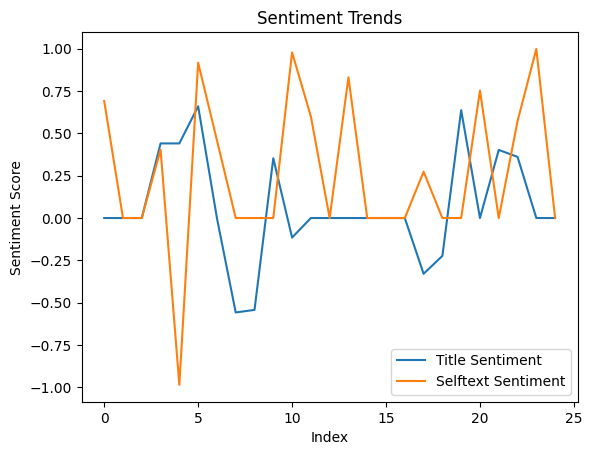

Aggregated Sentiment: 0.160282


In [22]:
# Trend Analysis: Plotting sentiment trends
df['index'] = range(len(df))  # Create a synthetic index based on the DataFrame length
plt.plot(df['index'], df['title_sentiment'], label='Title Sentiment')
plt.plot(df['index'], df['selftext_sentiment'], label='Selftext Sentiment')
plt.xlabel('Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends')
plt.legend()
plt.show()

# Aggregation: Calculate the overall sentiment score
df['overall_sentiment'] = (df['title_sentiment'] + df['selftext_sentiment']) / 2

# Calculate the aggregated sentiment score
aggregated_sentiment = df['overall_sentiment'].mean()

print("Aggregated Sentiment:", aggregated_sentiment)